In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [ ]:
#1
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

#rata rata gaji per dptr
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()

spark.sql('''
WITH GenderAverage AS (
    SELECT Gender, AVG(Salary) AS AverageSalary
    FROM employees
    GROUP BY Gender
)
SELECT e.*
FROM employees e
JOIN GenderAverage ga ON e.Gender = ga.Gender
WHERE e.Salary > ga.AverageSalary;
''').show()

spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees;
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
+-----+---+------+------+------+

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

spark.sql('''
WITH RankedEmployees AS (
    SELECT Name, Age, Salary,
           ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
    FROM employees
)
SELECT *
FROM RankedEmployees
WHERE rank <= 3;
''').show()

spark.sql('''
SELECT *
FROM (
    SELECT Name, Age, Salary,
           ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
    FROM employees
) AS RankedEmployees
WHERE rank <= 3;
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



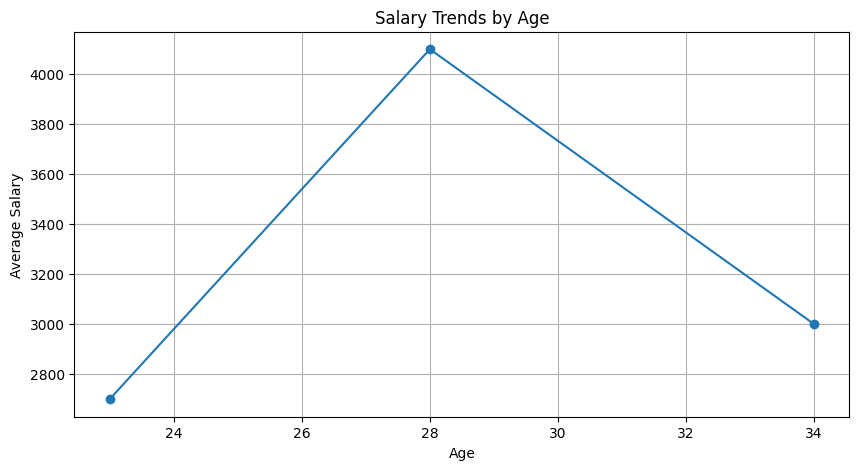

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


In [ ]:
#5
spark.sql('''
SELECT d.DeptName, e.Name, e.Salary,
       RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+-----+------+----+
| DeptName| Name|Salary|Rank|
+---------+-----+------+----+
|       HR|James|  3000|   1|
|       HR|  Lee|  2700|   2|
|Marketing| Anna|  4100|   1|
+---------+-----+------+----+



In [ ]:
#6
spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').show()

+---+-------------+
|Age|AverageSalary|
+---+-------------+
| 23|       2700.0|
| 28|       4100.0|
| 34|       3000.0|
+---+-------------+



+---------+-----------+-------------+
| DeptName|TotalSalary|EmployeeCount|
+---------+-----------+-------------+
|       HR|     122377|           33|
|Marketing|     112596|           30|
+---------+-----------+-------------+

+-----------+---+------+
|       Name|Age|Salary|
+-----------+---+------+
| Employee_6| 29|  4270|
|Employee_24| 29|  3946|
|Employee_25| 29|  4030|
|Employee_49| 29|  4364|
|Employee_50| 26|  4492|
|Employee_15| 34|  4490|
|Employee_32| 43|  4223|
| Employee_2| 39|  4889|
|Employee_19| 25|  3564|
|Employee_18| 27|  4954|
|Employee_33| 41|  3562|
|Employee_17| 28|  3940|
|Employee_34| 49|  2974|
|Employee_43| 35|  4713|
|Employee_14| 21|  4222|
|Employee_22| 21|  3730|
|Employee_26| 30|  4441|
| Employee_8| 23|  3966|
|Employee_27| 23|  4905|
| Employee_7| 46|  4118|
+-----------+---+------+
only showing top 20 rows

+------+-----------+------------------+-------------+
|DeptId|TotalSalary|     AverageSalary|EmployeeCount|
+------+-----------+-----------------

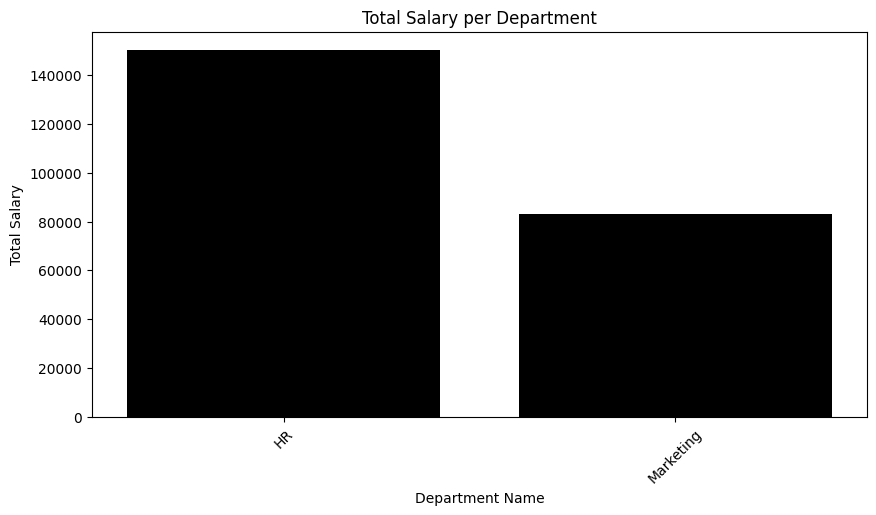

In [ ]:
# Homework
# 1
spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').show()

# 2
spark.sql('''
WITH AvgSalary AS (
    SELECT Age, AVG(Salary) AS AvgSal
    FROM employees
    GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN AvgSalary a ON e.Age = a.Age
WHERE e.Salary > a.AvgSal
''').show()

# 3
import random

# Generate a larger dataset
data = [(f'Employee_{i}', random.randint(20, 50), random.choice(['M', 'F']), random.randint(2500, 5000), random.randint(1, 3)) for i in range(1, 101)]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Create DataFrame
large_df = spark.createDataFrame(data, schema=columns)

# Create temp view
large_df.createOrReplaceTempView('employees')

# Perform SQL functions
spark.sql('''
SELECT DeptId, SUM(Salary) AS TotalSalary, AVG(Salary) AS AverageSalary, COUNT(*) AS EmployeeCount
FROM employees
GROUP BY DeptId
''').show()

# 4
import matplotlib.pyplot as plt
import pandas as pd

# Ambil data untuk visualisasi
total_salary_df = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').toPandas()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.bar(total_salary_df['DeptName'], total_salary_df['TotalSalary'], color='black')
plt.xlabel('Department Name')
plt.ylabel('Total Salary')
plt.title('Total Salary per Department')
plt.xticks(rotation=45)
plt.show()